In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import importlib

module_path = '/Users/morton/PycharmProjects/psifr'
if module_path not in sys.path:
    sys.path.append(module_path)
from psifr import fr
data_file = os.path.join(module_path, 'data', 'cfr_raw_data.csv')

In [30]:
# load cfr data
df = pd.read_csv(data_file, dtype={'category': 'category'})
df.category.cat.as_ordered(inplace=True)
study = df.query('trial_type == "study"').copy()
recall = df.query('trial_type == "recall"').copy()
data = fr.merge_lists(study, recall, list_keys=['list_type'], study_keys=['category'])

In [4]:
# get valid trials for one subject
clean = data.query('subject == 1 and repeat == 0 and ~intrusion')

In [74]:
subj_df = clean.loc[(clean['subject'] == 1)]
subj_df.query('recalled').loc[subj_df['list'] == 1].sort_values('output')

,subject,list,item,input,output,recalled,repeat,intrusion,list_type,category
24,1,1,CHAIN,24.0,1.0,True,0,False,pure,obj
22,1,1,SMART CAR,22.0,2.0,True,0,False,pure,obj
17,1,1,BAYONET,17.0,3.0,True,0,False,pure,obj
20,1,1,WATCH,20.0,4.0,True,0,False,pure,obj
16,1,1,CAR SEAT,16.0,5.0,True,0,False,pure,obj
21,1,1,PILL,21.0,6.0,True,0,False,pure,obj
5,1,1,JACKHAMMER,6.0,7.0,True,0,False,pure,obj
19,1,1,STONE,19.0,8.0,True,0,False,pure,obj
8,1,1,SHOVEL,9.0,9.0,True,0,False,pure,obj
4,1,1,BACKPACK,5.0,10.0,True,0,False,pure,obj


In [14]:
rec = clean.loc[clean['output'].notna()].sort_values(['subject', 'list', 'output'])

In [40]:
grouped = rec.groupby('list')
grouped.get_group(31)['input'].astype('int').tolist()

[24, 23, 21, 20, 19, 18, 17]

In [50]:
recalls = [r['input'].astype('int').tolist() for name, r in rec.groupby('list')]

In [51]:
recalls

[[24, 22, 17, 20, 16, 21, 6, 19, 9, 5, 8, 14, 1, 18, 12, 13, 4],
 [24, 23, 16, 15, 1, 17, 18, 19, 12, 10, 3, 6, 14, 7],
 [23, 24, 22, 1, 2, 9, 10, 11, 18, 5, 13, 12, 16, 7, 15, 21, 3, 20],
 [24, 22, 16, 18, 3, 7, 19, 12, 23],
 [24, 23, 16, 22, 7, 14, 19, 13, 17, 10, 8, 12],
 [24, 23, 4, 3, 16, 17, 14, 9, 22, 11, 2, 1, 20],
 [24, 12, 6, 3, 9, 10, 22, 19, 17, 7, 11, 15, 23, 21],
 [24, 23, 20, 22, 16, 2, 6, 4, 1, 17, 21],
 [24, 23, 22, 10, 7, 16, 15, 14, 13, 17, 6],
 [24, 23, 13, 4, 7, 15],
 [24, 1, 3, 15, 18, 17, 9],
 [24, 23, 3, 7, 6, 14, 8, 5, 2, 17, 19, 20],
 [24, 2, 7, 14, 11, 6, 3, 4, 15],
 [24, 18, 4, 20, 3, 12],
 [24, 23, 18, 11, 20, 15, 22, 19, 2, 1, 6],
 [24, 22, 7, 14, 3],
 [24, 22, 9, 10, 23, 19, 18, 6, 5, 16, 15, 13],
 [24, 23, 22, 14, 15, 5, 10, 7, 2, 13, 3, 17, 19],
 [23, 24, 11, 20, 10, 9, 7],
 [24, 23, 11, 22, 15, 1, 3, 12, 20, 7, 18, 21, 4, 14, 5, 16, 8],
 [24, 23, 16, 15, 22, 21, 20, 19, 6, 11, 7, 14, 10],
 [24, 23, 15, 4, 3, 16, 1, 7, 6, 22, 18],
 [24, 23, 22, 17, 2, 1

In [72]:
import importlib
importlib.reload(fr)
list_length = 24
prob = fr.lag_crp(recalls, list_length)
prob

-23    0.020833
-22    0.035294
-21    0.025862
-20    0.023622
-19    0.014085
-18    0.011976
-17    0.044199
-16    0.015306
-15    0.048889
-14    0.021459
-13    0.032129
-12    0.049242
-11    0.040892
-10    0.028986
-9     0.040541
-8     0.041270
-7     0.055728
-6     0.050000
-5     0.047091
-4     0.033058
-3     0.063660
-2     0.085000
-1     0.213075
 0          NaN
 1     0.117647
 2     0.057239
 3     0.041958
 4     0.079137
 5     0.042146
 6     0.081633
 7     0.054054
 8     0.066986
 9     0.075269
 10    0.037433
 11    0.063218
 12    0.051948
 13    0.068182
 14    0.016260
 15    0.039604
 16    0.074468
 17    0.027397
 18    0.047619
 19    0.061224
 20    0.028571
 21    0.000000
 22    0.000000
 23         NaN
dtype: float64

In [54]:
importlib.reload(fr)
list_length = 24
subj_df = clean.groupby('subject').get_group(1)
rec = subj_df.loc[subj_df['output'].notna()].sort_values(['subject', 'list', 'output'])
recalls = [r['input'].astype('int').tolist()
           for name, r in rec.groupby('list')]
recalls
#prob = fr.lag_crp(recalls, list_length)
#prob

[[24, 22, 17, 20, 16, 21, 6, 19, 9, 5, 8, 14, 1, 18, 12, 13, 4],
 [24, 23, 16, 15, 1, 17, 18, 19, 12, 10, 3, 6, 14, 7],
 [23, 24, 22, 1, 2, 9, 10, 11, 18, 5, 13, 12, 16, 7, 15, 21, 3, 20],
 [24, 22, 16, 18, 3, 7, 19, 12, 23],
 [24, 23, 16, 22, 7, 14, 19, 13, 17, 10, 8, 12],
 [24, 23, 4, 3, 16, 17, 14, 9, 22, 11, 2, 1, 20],
 [24, 12, 6, 3, 9, 10, 22, 19, 17, 7, 11, 15, 23, 21],
 [24, 23, 20, 22, 16, 2, 6, 4, 1, 17, 21],
 [24, 23, 22, 10, 7, 16, 15, 14, 13, 17, 6],
 [24, 23, 13, 4, 7, 15],
 [24, 1, 3, 15, 18, 17, 9],
 [24, 23, 3, 7, 6, 14, 8, 5, 2, 17, 19, 20],
 [24, 2, 7, 14, 11, 6, 3, 4, 15],
 [24, 18, 4, 20, 3, 12],
 [24, 23, 18, 11, 20, 15, 22, 19, 2, 1, 6],
 [24, 22, 7, 14, 3],
 [24, 22, 9, 10, 23, 19, 18, 6, 5, 16, 15, 13],
 [24, 23, 22, 14, 15, 5, 10, 7, 2, 13, 3, 17, 19],
 [23, 24, 11, 20, 10, 9, 7],
 [24, 23, 11, 22, 15, 1, 3, 12, 20, 7, 18, 21, 4, 14, 5, 16, 8],
 [24, 23, 16, 15, 22, 21, 20, 19, 6, 11, 7, 14, 10],
 [24, 23, 15, 4, 3, 16, 1, 7, 6, 22, 18],
 [24, 23, 22, 17, 2, 1

In [141]:
importlib.reload(fr)
prob = fr.lag_crp(recalls, list_length)
prob

AttributeError: 'list' object has no attribute 'query'

In [26]:
data = [1, 3, 6, 4, -4, 6, 1]
bins = np.arange(-23, 24)
np.histogram(data, bins)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [112]:
importlib.reload(fr)
df_subj = clean.groupby('subject')
rec = df_subj.get_group(1).sort_values('output')
recalls = [r['input'].astype('int').tolist()
           for name, r in rec.groupby('list')]

In [113]:
lags = np.arange(-list_length + 1, list_length)
actual = pd.Series(0, dtype='int', index=lags)
possible = pd.Series(0, dtype='int', index=lags)
possible_recalls = list(range(24))

In [104]:
%%timeit
for prev, curr, poss in fr._transition_masker(recalls[0], possible_recalls):
    actual[curr - prev] += 1
    possible[np.subtract(poss, prev)] += 1

20.1 ms ± 473 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [106]:
%%timeit
list_actual = []
list_possible = []
for prev, curr, poss in fr._transition_masker(recalls[0], possible_recalls):
    list_actual.append(prev - curr)
    list_possible.extend(np.subtract(poss, prev))

145 µs ± 2.46 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [114]:
list_actual = []
list_possible = []
for prev, curr, poss in fr._transition_masker(recalls[0], possible_recalls):
    list_actual.append(prev - curr)
    list_possible.extend(np.subtract(poss, prev))

In [137]:
np.histogram(list_possible, np.hstack((lags, list_length)))[0].shape

(47,)

In [131]:
actual = pd.Series(0, dtype='int', index=lags)
possible = pd.Series(0, dtype='int', index=lags)
actual[list_actual] += 1
possible[list_possible] += 1
np.histogram(list_possible, lags + [list_length])[0]

array([10,  9, 11,  9,  8,  7,  6,  6,  6,  4,  3,  4,  4,  2,  1,  1,  2,
        1,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [97]:
%%time
actual, possible = fr.subject_lag_crp(recalls, 24)

CPU times: user 991 ms, sys: 11.1 ms, total: 1 s
Wall time: 1 s


In [142]:
%%time
importlib.reload(fr)
crp = fr.lag_crp(clean, 24)
crp

CPU times: user 1.18 s, sys: 5.97 ms, total: 1.19 s
Wall time: 1.19 s


,subject,lag,prob,actual,possible
0,1,-23,0.000000,0,37
1,1,-22,0.030769,2,65
2,1,-21,0.037037,3,81
3,1,-20,0.030928,3,97
4,1,-19,0.017094,2,117
...,...,...,...,...,...
1875,47,19,0.060000,3,50
1876,47,20,0.057143,2,35
1877,47,21,0.043478,1,23
1878,47,22,0.090909,1,11


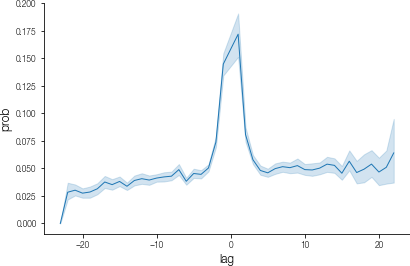

In [140]:
sns.lineplot(x='lag', y='prob', data=crp)

In [83]:
importlib.reload(fr)
clean = data.query('repeat == 0 and ~intrusion')

In [88]:
%%timeit
crp = fr.lag_crp(clean, 24)

18.4 s ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [44]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.19 s ± 9.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.15 s ± 6.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [61]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.17 s ± 9.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [67]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.18 s ± 13 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

2.33 s ± 39.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.15 s ± 13.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.12 s ± 5.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [85]:
%%timeit
crp = fr.lag_crp_lists(clean, 24)

1.06 s ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
crp

,subject,lag,prob
0,1,-23,0.020833
1,1,-22,0.035294
2,1,-21,0.025862
3,1,-20,0.023622
4,1,-19,0.014085
...,...,...,...
1875,47,19,0.060000
1876,47,20,0.054054
1877,47,21,0.043478
1878,47,22,0.066667


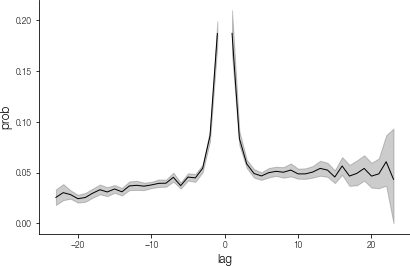

In [49]:
import seaborn as sns
sns.lineplot(x='lag', y='prob', data=crp.query('lag < 0'), color='k')
sns.lineplot(x='lag', y='prob', data=crp.query('lag > 0'), color='k')

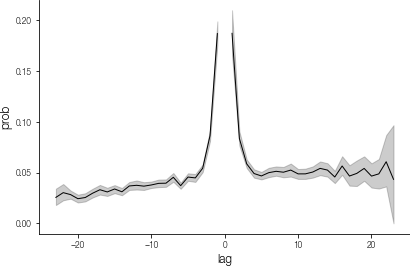

In [19]:
import seaborn as sns
sns.lineplot(x='lag', y='prob', data=crp.query('lag < 0'), color='k')
sns.lineplot(x='lag', y='prob', data=crp.query('lag > 0'), color='k')

In [67]:
for subject, subj_df in clean.groupby('subject'):
    print(subject, subj_df)

1       subject  list              item  input  output  recalled  repeat  \
0           1     1             TOWEL    1.0    13.0      True       0   
1           1     1             LADLE    2.0     NaN     False       0   
2           1     1           THERMOS    3.0     NaN     False       0   
3           1     1              LEGO    4.0    18.0      True       0   
4           1     1          BACKPACK    5.0    10.0      True       0   
...       ...   ...               ...    ...     ...       ...     ...   
1180        1    48       CHE GUEVARA   20.0     NaN     False       0   
1181        1    48        OAHU BEACH   21.0     7.0      True       0   
1182        1    48      GATEWAY ARCH   22.0     6.0      True       0   
1183        1    48       WHITE HOUSE   23.0     2.0      True       0   
1184        1    48  WRIGLEY BUILDING   24.0     1.0      True       0   

      intrusion list_type category  
0         False      pure      obj  
1         False      pure      obj 

In [63]:
import pandas as pd
pd.DataFrame({'subject': 1, 'prob': prob})

,subject,prob
-23,1,0.020833
-22,1,0.035294
-21,1,0.025862
-20,1,0.023622
-19,1,0.014085
-18,1,0.011976
-17,1,0.044199
-16,1,0.015306
-15,1,0.048889
-14,1,0.021459


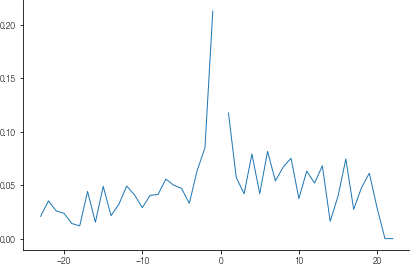

In [60]:
lags = np.arange(-list_length + 1, list_length)
import matplotlib.pyplot as plt
plt.plot(lags, prob)

In [49]:
num_raw = np.bincount(np.array(actual) + list_length - 1)
den_raw = np.bincount(np.array(possible) + list_length - 1)
den_raw

array([ 48,  85, 116, 127, 142, 167, 181, 196, 225, 233, 249, 264, 269,
       276, 296, 315, 323, 340, 361, 363, 377, 400, 413,   0, 306, 297,
       286, 278, 261, 245, 222, 209, 186, 187, 174, 154, 132, 123, 101,
        94,  73,  63,  49,  35,  13,   4])